In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date

In [2]:
## I acquire stock list in thailand ###
ex = pd.read_excel('listedCompanies_th_TH.xlsx', sheet_name='listedCompanies_th_TH',skiprows=1)
df = pd.DataFrame(ex['หลักทรัพย์'].astype('str') + '.bk')
df['market'] = ex['ตลาด']
df = df.rename(columns={'หลักทรัพย์' : 'ticker'})
df = df.reset_index(drop=True)
# df = df[:25]

In [3]:
# df = pd.DataFrame(['MO','ASO','HPQ','AMCX','AMLX','CROX','KO'],columns=['ticker'])
# df

### Acquire informations from yfinance function >> .info

In [4]:
# 1st pulling date for this data #
df['date_pulling'] = date.today()

In [5]:
# 2nd acquiring information from .info #
info_attribute_list = [
    'industry',
    'sector',
    'marketCap',
    'currentPrice',
    'enterpriseValue',
]
# 3rd acquiring information from .quarterly_balance_sheet #
balancesheet_list = [
    'Total Assets',
    'Current Liabilities'
]

# 4th acquiring information from .quarterly_financials #
ttm = 4
financials_list = [
    'EBIT'
]

info_attribute_list_buffer = []
balancesheet_list_buffer = []
financials_list_buffer = []
for i in range(len(df)):
    yfticker = yf.Ticker(df['ticker'][i])

    # 2nd acquiring information from .info #
    info_attribute_list_buffer_r = []
    for j in range(len(info_attribute_list)):
        try:
            info_attribute_list_buffer_r.append(yfticker.info[info_attribute_list[j]])
        except:
            info_attribute_list_buffer_r.append(None)
    info_attribute_list_buffer.append(info_attribute_list_buffer_r)

    # 3rd acquiring information from .balancesheet #
    balancesheet_list_buffer_r = []
    for j in range(len(balancesheet_list)):
        try:
            balancesheet_list_buffer_r.append(yfticker.quarterly_balance_sheet.loc[yfticker.quarterly_balance_sheet.index == balancesheet_list[j]].values[0][0])
        except:
            balancesheet_list_buffer_r.append(None)
    balancesheet_list_buffer.append(balancesheet_list_buffer_r)

    # 4th acquiring information from .quarterly_financials #
    financials_list_buffer_r = []
    for j in range(len(financials_list)):
        try:
            financials_list_buffer_r.append(np.array([yfticker.quarterly_financials.loc[yfticker.quarterly_financials.index == financials_list[j]].values[0][i] for i in range(ttm)]).sum())
        except:
            financials_list_buffer_r.append(None)
    try:
        financials_list_buffer_r.append(yfticker.quarterly_financials.columns[0])
    except:
        financials_list_buffer_r.append(None)
    financials_list_buffer.append(financials_list_buffer_r)

financials_list.append('ttm_lastest')
df = df.join(pd.DataFrame(info_attribute_list_buffer, columns=info_attribute_list))
df = df.join(pd.DataFrame(balancesheet_list_buffer, columns=balancesheet_list))
df = df.join(pd.DataFrame(financials_list_buffer, columns=financials_list))


##### Drop NAN #############
df = df.dropna()
##### Drop where marketcap and EBIT < 0#############
df = df.loc[df['enterpriseValue'] >0]
df = df.loc[df['EBIT'] >0]
df = df.reset_index(drop=True)


In [6]:

### Next I perform calculations for MF_ROC and MF_EY ###
df['MF_ROC'] = df['EBIT']/(df['Total Assets'] - df['Current Liabilities'])
df['MF_EY'] = df['EBIT']/df['enterpriseValue']
df

,ticker,market,date_pulling,industry,sector,marketCap,currentPrice,enterpriseValue,Total Assets,Current Liabilities,EBIT,ttm_lastest,MF_ROC,MF_EY
0,2S.bk,SET,2024-08-13,Steel,Basic Materials,1.594989e+09,2.90,1.325299e+09,2.400035e+09,3.039420e+08,1.225020e+08,2024-03-31,0.058443,0.092433
1,3K-BAT.bk,SET,2024-08-13,Electrical Equipment & Parts,Industrials,4.174800e+09,53.25,3.860087e+09,3.736470e+09,8.851644e+08,2.054459e+08,2024-03-31,0.072053,0.053223
2,A5.bk,mai,2024-08-13,Real Estate - Development,Real Estate,3.369080e+09,2.86,4.583295e+09,3.836102e+09,1.114288e+09,6.915935e+08,2024-03-31,0.254093,0.150894
3,AAI.bk,SET,2024-08-13,Packaged Foods,Consumer Defensive,1.317500e+10,6.20,1.170753e+10,5.828192e+09,5.910240e+08,9.276925e+08,2024-06-30,0.177136,0.079239
4,AAV.bk,SET,2024-08-13,Airlines,Industrials,2.878400e+10,2.24,7.162734e+10,7.053564e+10,2.740129e+10,1.790460e+09,2024-03-31,0.041509,0.024997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,YGG.bk,mai,2024-08-13,Entertainment,Communication Services,7.524963e+08,1.25,7.191482e+08,7.375050e+08,7.321346e+07,6.699039e+07,2024-03-31,0.100845,0.093152
658,YONG.bk,mai,2024-08-13,Building Materials,Basic Materials,7.888000e+08,1.16,1.302733e+09,1.307177e+09,2.661980e+08,1.703912e+08,2024-03-31,0.163684,0.130795
659,YUASA.bk,mai,2024-08-13,Auto Parts,Consumer Cyclical,1.183875e+09,11.00,7.535075e+08,1.646425e+09,3.800130e+08,1.818541e+08,2024-03-31,0.143598,0.241343
660,ZEN.bk,SET,2024-08-13,Restaurants,Consumer Cyclical,1.625108e+09,5.45,2.708834e+09,3.230292e+09,9.035990e+08,2.211030e+08,2024-03-31,0.095029,0.081623


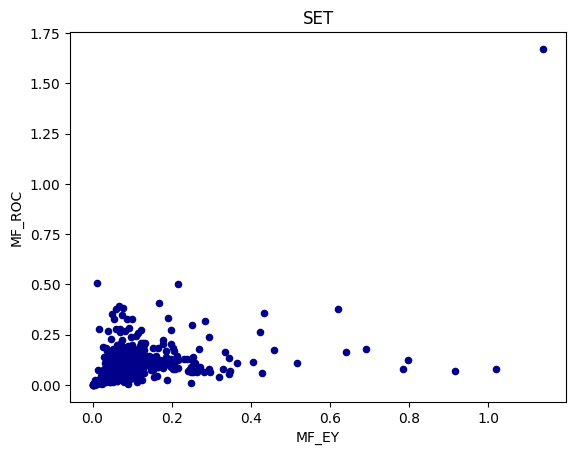

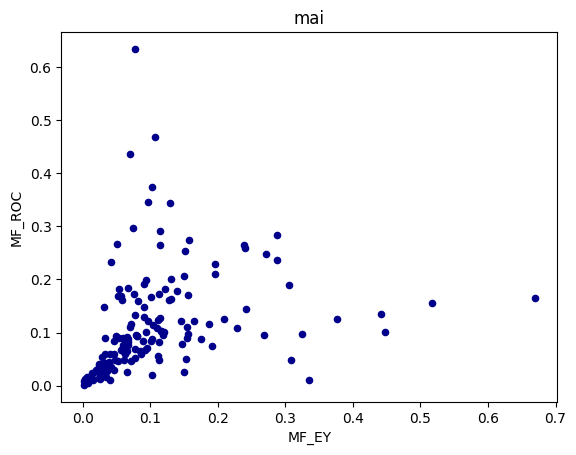

In [7]:
### Explore Market Cap ### By sector #### 
df.loc[df['market'] == 'SET'].plot.scatter(x='MF_EY',
                      y='MF_ROC',
                      c='DarkBlue',title = 'SET')
df.loc[df['market'] == 'mai'].plot.scatter(x='MF_EY',
                      y='MF_ROC',
                      c='DarkBlue',title = 'mai')

df.to_csv('data.csv',index= False)

In [8]:
df['sector'].unique()

array(['Basic Materials', 'Industrials', 'Real Estate',
       'Consumer Defensive', 'Utilities', 'Consumer Cyclical',
       'Communication Services', 'Financial Services', 'Healthcare',
       'Technology', 'Energy'], dtype=object)

In [9]:
### Drop Utilities, Energy, and Financial Services  as suggested from the book ###
sectortoexclude = ['Utilities','Energy','Financial Services']
for i in sectortoexclude:
    print(i)
    try:
         
        df = df.loc[df['sector'] != i]
    except:
        None
df = df.reset_index(drop=True)

Utilities
Energy
Financial Services


In [13]:
#### Select market size by choosing ' market ' ###
market = 'SET'
df_market = df.loc[df['market'] == market]
df_market = df_market.reset_index(drop=True)

In [14]:
### Ranking regarding MFs####

df_market['Ranking_MF_ROC'] = df_market['MF_ROC'].rank()
df_market['Ranking_MF_EY'] = df_market['MF_EY'].rank()
df_market['Ranking_MF'] = df_market['Ranking_MF_ROC'] + df_market['Ranking_MF_EY']

df_market.loc[df_market['Ranking_MF'] == df_market['Ranking_MF'].max()]

,ticker,market,date_pulling,industry,sector,marketCap,currentPrice,enterpriseValue,Total Assets,Current Liabilities,EBIT,ttm_lastest,MF_ROC,MF_EY,Ranking_MF_ROC,Ranking_MF_EY,Ranking_MF
162,JAS.bk,SET,2024-08-13,Telecom Services,Communication Services,2.106186e+10,2.54,1.984784e+10,1.799440e+10,4.457690e+09,2.261631e+10,2024-03-31,1.670739,1.139484,437.0,437.0,874.0


In [16]:
df_sorted = df_market.sort_values(by=['Ranking_MF'],ascending=False)
df_sorted = df_sorted.reset_index(drop=True)
df_sorted[:30]

,ticker,market,date_pulling,industry,sector,marketCap,currentPrice,enterpriseValue,Total Assets,Current Liabilities,EBIT,ttm_lastest,MF_ROC,MF_EY,Ranking_MF_ROC,Ranking_MF_EY,Ranking_MF
0,JAS.bk,SET,2024-08-13,Telecom Services,Communication Services,2.106186e+10,2.54,1.984784e+10,1.799440e+10,4.457690e+09,2.261631e+10,2024-03-31,1.670739,1.139484,437.0,437.0,874.0
1,Q-CON.bk,SET,2024-08-13,Building Products & Equipment,Industrials,3.560000e+09,8.90,2.205099e+09,3.082648e+09,4.135580e+08,9.544314e+08,2024-06-30,0.357587,0.432829,430.0,430.0,860.0
2,PIN.bk,SET,2024-08-13,Real Estate - Development,Real Estate,5.428800e+09,4.68,6.267088e+09,6.263542e+09,6.600270e+08,1.774394e+09,2024-03-31,0.316657,0.283129,423.0,419.0,842.0
3,SRICHA.bk,SET,2024-08-13,Engineering & Construction,Industrials,2.370574e+09,7.65,1.399618e+09,2.911026e+09,6.521662e+08,5.931280e+08,2024-03-31,0.262579,0.423779,412.0,428.0,840.0
4,TNR.bk,SET,2024-08-13,Household & Personal Products,Consumer Defensive,3.030000e+09,10.10,3.364016e+09,2.178707e+09,7.347250e+08,7.261320e+08,2024-06-30,0.502868,0.215853,435.0,400.0,835.0
5,JCK.bk,SET,2024-08-13,Real Estate - Development,Real Estate,1.292935e+09,0.34,6.192852e+09,9.097491e+09,3.840008e+09,1.562178e+09,2024-03-31,0.297134,0.252255,422.0,410.0,832.0
6,TEKA.bk,SET,2024-08-13,Engineering & Construction,Industrials,6.660000e+08,2.22,2.403760e+08,1.663413e+09,7.320370e+08,1.660847e+08,2024-06-30,0.178322,0.690937,381.0,434.0,815.0
7,AS.bk,SET,2024-08-13,Electronic Gaming & Multimedia,Communication Services,1.787304e+09,3.58,1.735743e+09,1.406244e+09,4.061850e+08,3.326363e+08,2024-06-30,0.332617,0.191639,427.0,388.0,815.0
8,PT.bk,SET,2024-08-13,Information Technology Services,Technology,2.555001e+09,9.00,2.318138e+09,2.410914e+09,1.457667e+09,3.886185e+08,2024-06-30,0.407679,0.167642,434.0,380.0,814.0
9,UVAN.bk,SET,2024-08-13,Farm Products,Consumer Defensive,8.131000e+09,8.65,7.270002e+09,5.792787e+09,5.167410e+08,1.443106e+09,2024-06-30,0.273520,0.198502,416.0,392.0,808.0
